# Final Project, Part 1

The purpose of this assignment is to explore the data you will use for *all parts* of your Final Project. *Please note: you will do this portion of the Final Project individually, even if you plan on working in a group for Parts 2 and 3.*
    
**Please see Homework Prompt in PrairieLearn interface for more details on the requirements for this assignment.**

A rough outline of elements of code and write-up is shown below:

## Dataset information

* What is the "name" of the dataset?
* Where did you obtain it?
* Where can we obtain it? (i.e., URL)
* What is the license of the dataset? What are we allowed to do with it?  This information is generally found in an "About" page or in documentation.  If there is no explicit license, use what you find in the dataset documentation to make your "best guess".
* How big is it in file size and in items?  Looking ahead, [how does this relate to GitHub's limits on uploading large files](https://docs.github.com/en/repositories/working-with-files/managing-large-files/about-large-files-on-github)?  If you plan on hosting the data yourself and it is larger than GitHub's limits, state your plan for how you will address this issue.  (Note: your plan might change a little bit from what you propose here and that is ok!)
* Make a simple plot showing a relationship of interest. You can use matplotlib or pandas (or other). Don't worry about colors, labels or anything else of that nature!  Include a few sentences about what your plot is aiming to show and why it is interesting.


Dataset Name:
County-Level Asthma Prevalence Data (U.S.)

Source:
The dataset was obtained from the CDC’s Environmental Public Health Tracking Network.

Access URL:
https://ephtracking.cdc.gov/DataExplorer/?query=2e0d15c6-2a20-41ca-832f-95e0b79dd473

License:
The dataset does not provide an explicit license. However, based on the CDC’s general data usage policy, it is assumed that this dataset is public domain and may be used freely for educational, non-commercial, and analytical purposes with appropriate attribution. No personal identifying information is included, and the data is provided for public health research and awareness.

File Size and Item Count:

File size: ~1.1 MB (when downloaded as CSV)

Item count: 12,482 rows and 11 columns

This size is well below GitHub’s single file upload limit (100 MB), so the dataset can be safely hosted in a GitHub repository if needed.

Plan for Hosting:
Since the dataset is small (~1.1 MB), I have uploaded the raw .csv file directly into the course workspace along with my Jupyter Notebook. This ensures that everything needed to run the notebook is available in one place. No additional hosting or external download mechanism is necessary.

## Data exploration and Plot

Explore the dataset in the Workspace. Make sure you include things that did and did not work (be sure to comment out things that don't work). 

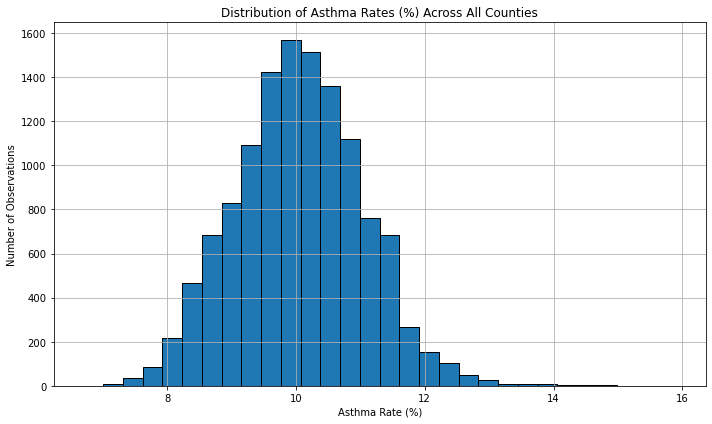

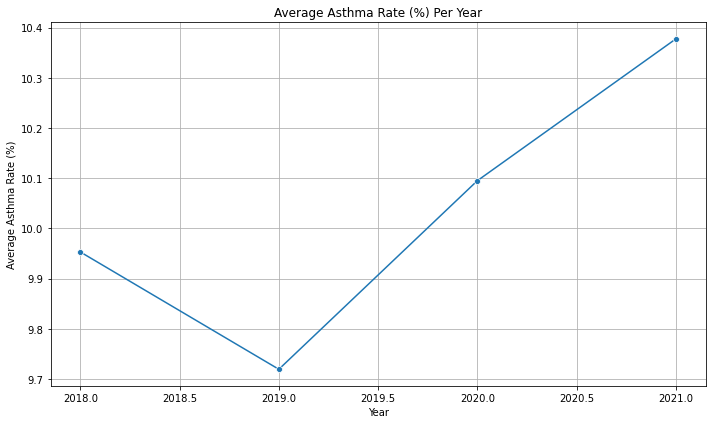

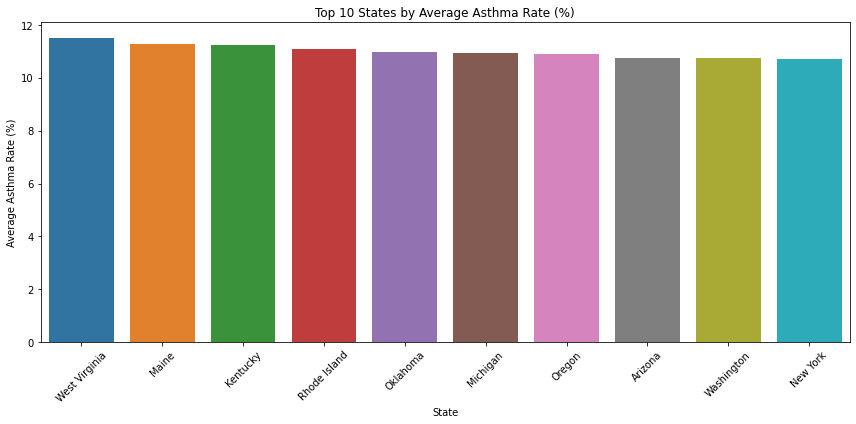

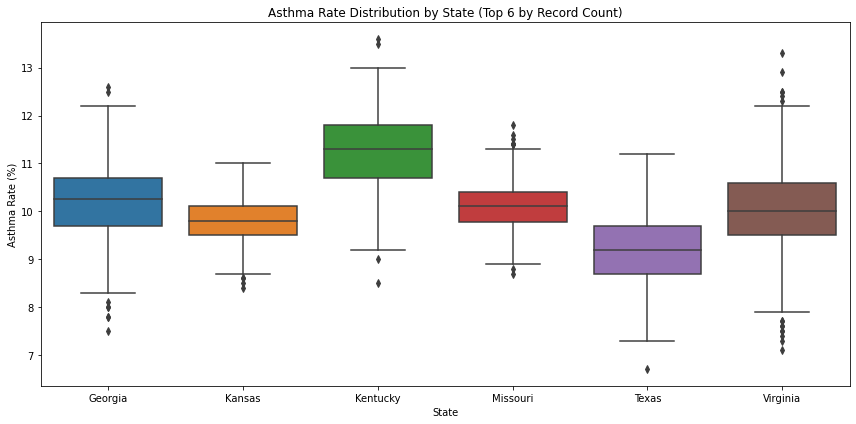

In [1]:
import os
os.environ['MPLCONFIGDIR'] = os.getcwd()  # Set a writable config directory

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Asthma.csv')

# Drop columns with all null values
df_cleaned = df.drop(columns=['Data Comment', 'Unnamed: 10'])

# Clean percentage-based columns and convert to float
percentage_columns = ['Value', 'Confidence Interval Low', 'Confidence Interval High']
for col in percentage_columns:
    df_cleaned[col] = df_cleaned[col].str.replace('%', '', regex=False).astype(float)

# Plot 1: Distribution of asthma rates across all observations
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Value'], bins=30, edgecolor='black')
plt.title('Distribution of Asthma Rates (%) Across All Counties')
plt.xlabel('Asthma Rate (%)')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Average asthma rate per year
avg_asthma_by_year = df_cleaned.groupby('Year')['Value'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_asthma_by_year, x='Year', y='Value', marker='o')
plt.title('Average Asthma Rate (%) Per Year')
plt.xlabel('Year')
plt.ylabel('Average Asthma Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Top 10 states by average asthma rate
state_avg = df_cleaned.groupby('State')['Value'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=state_avg, x='State', y='Value')
plt.title('Top 10 States by Average Asthma Rate (%)')
plt.xlabel('State')
plt.ylabel('Average Asthma Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Plot: Distribution of asthma rates by state (Top 6 states by frequency)
top_states = df_cleaned['State'].value_counts().head(6).index.tolist()
subset = df_cleaned[df_cleaned['State'].isin(top_states)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='State', y='Value')
plt.title('Asthma Rate Distribution by State (Top 6 by Record Count)')
plt.xlabel('State')
plt.ylabel('Asthma Rate (%)')
plt.tight_layout()
plt.show()

# Things that did NOT work 
# Attempted to create a scatterplot by CountyFIPS and Year, but it produced a crowded and unclear plot
# sns.scatterplot(data=df_cleaned, x='CountyFIPS', y='Value', hue='Year')
# plt.title('Scatterplot of Asthma Rates by County (Not Insightful)')
# plt.show()

# Attempted to parse confidence interval strings, but values already exist as separate columns
# df_cleaned[['CI_Low', 'CI_High']] = df_cleaned['95% Confidence Interval'].str.extract(r'\((.*?)\s*-\s*(.*?)\)')


## Plot Summary

Summarize the characteristics of the dataset in words: what does it represent, what are the fields/columns/rows, what data types are they, etc.

# Plot Summary
The dataset represents asthma prevalence rates across U.S. counties from 2018 to 2021. Each row corresponds to a single observation for a specific county and year, and the dataset includes a total of 12,482 observations.

## The main fields include:

StateFIPS / CountyFIPS: Numeric geographic identifiers for each state and county.

State / County: Names of the corresponding states and counties.

Year: The year of the observation (2018–2021).

Value: The reported asthma rate in percentage format (converted to float).

Confidence Interval Low / High: Lower and upper bounds of the 95% confidence interval for the asthma rate (also converted from percentage strings to float).

Two columns (Data Comment and Unnamed: 10) were dropped due to containing only null values. The cleaned dataset was then used to generate several visualizations exploring the distribution of asthma rates, trends over time, and state-level patterns.

The data types are primarily numerical (int and float) and categorical (object). Cleaning involved converting percentage strings to numeric values to enable statistical analysis and plotting.

The exploration showed that asthma rates typically fall between 7% and 12%, with some variability across years and states. Certain states consistently reported higher average rates, and the overall trend remained relatively stable over the observed period.